<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Statistika_v_Python/Kejs_stadi/DZ_Kondratev_STPY-48_stat_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание к лекции "Статистика. Практика"

## Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/vgsales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

### Решение Задания 1

### импорт библиотек

In [240]:
# импорт библиотек
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

### Загружаем данные

In [241]:
df = pd.read_csv('https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Statistika_v_Python/Kejs_stadi/vgsales.csv')
# Загружаем данные
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


### 1) Как критики относятся к спортивным играм?

* H0: Средняя оценка критиков по спортивным играм равна средней оценке критиков по всем играм.
* H1: Средняя оценка критиков по спортивным играм отличается от средней оценки критиков по всем играм.

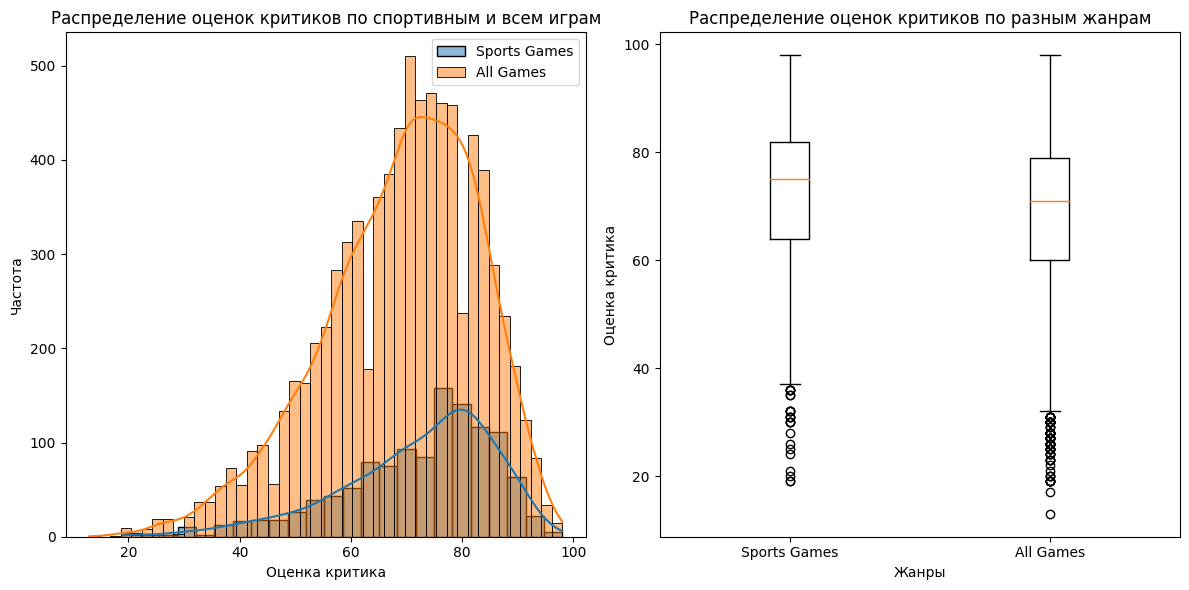

Отклоняем нулевую гипотезу. Средняя оценка критиков по спортивным играм больше средней оценки критиков по всем играм.

Результаты t-теста для спортивных игр и всех игр:
t-статистика: 6.950167570249341
p-значение: 3.8930663808129205e-12

       Базовые статистики спортивных игр  Базовые статистики всех игр
count                        1194.000000                  8137.000000
mean                           71.968174                    68.967679
std                            13.878433                    13.938165
min                            19.000000                    13.000000
25%                            64.000000                    60.000000
50%                            75.000000                    71.000000
75%                            82.000000                    79.000000
max                            98.000000                    98.000000


In [242]:
# Выборка данных по спортивным играм
sports_games = df[df['Genre'] == 'Sports']['Critic_Score'].dropna()

# Выборка данных по всем играм
all_games = df['Critic_Score'].dropna()

# Проведение t-теста
t_statistic, p_value = stats.ttest_ind(sports_games, all_games)

# Создаем список данных для boxplot
data = [sports_games, all_games]

# Создаем список меток для оси x
labels = ['Sports Games', 'All Games']

# Создание гистограмм и кривых плотности
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(sports_games, kde=True, label='Sports Games')
sns.histplot(all_games, kde=True, label='All Games')
plt.xlabel('Оценка критика')
plt.ylabel('Частота')
plt.title('Распределение оценок критиков по спортивным и всем играм')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot(data, labels=labels)
plt.xlabel('Жанры')
plt.ylabel('Оценка критика')
plt.title('Распределение оценок критиков по разным жанрам')

# Отображение графиков
plt.tight_layout()
plt.show()

# Статистический вывод
alpha = 0.05
if p_value < alpha:
    if t_statistic < 0:
        print('Отклоняем нулевую гипотезу. Средняя оценка критиков по спортивным играм меньше средней оценки критиков по всем играм.')
    else:
        print('Отклоняем нулевую гипотезу. Средняя оценка критиков по спортивным играм больше средней оценки критиков по всем играм.')
else:
    print('Принимаем нулевую гипотезу. Средняя оценка критиков по спортивным играм равна средней оценке критиков по всем играм.')

# Вывод результатов
print()
print('Результаты t-теста для спортивных игр и всех игр:')
print('t-статистика:', t_statistic)
print('p-значение:', p_value)

# Создаем DataFrame с базовыми статистиками
stats_df = pd.DataFrame({
    'Базовые статистики спортивных игр': sports_games.describe(),
    'Базовые статистики всех игр': all_games.describe()
})

# Выводим DataFrame
print()
print(stats_df)

Из результатов `t-теста` для спортивных игр и всех игр следует:

1. Очень маленькое значение p-значения (3.8930663808129205e-12) говорит о том, что есть статистически значимая разница между оценками критиков для спортивных игр и всех игр.
2. Значение t-статистики (6.950167570249341) показывает, что средняя оценка критиков для спортивных игр значительно выше, чем для всех игр.

Базовые статистики подтверждают эту разницу:
- Для спортивных игр (count=1194): средняя оценка критиков - 71.97, стандартное отклонение - 13.88.
- Для всех игр (count=8137): средняя оценка критиков - 68.97, стандартное отклонение - 13.94.

Исходя из распределения, можно сделать вывод, что спортивные игры имеют немного более высокие оценки критиков по сравнению с общими играми. Оба распределения оценок критиков, как для спортивных игр, так и для всех игр, имеют схожие характеристики и являются приближенными к нормальному распределению. Это означает, что большинство оценок сконцентрированы вокруг среднего значения, а разница между ними может быть объяснена случайными факторами или другими влияниями..

При сравнении распределений оценок критиков медиана может быть более надежным показателем для определения наличия разницы между группами. В данном случае медиана для спортивных игр равна 75, а для всех игр  71, что также указывает на то, что спортивные игры имеют более высокие оценки критиков.

### 2) Критикам нравятся больше игры на PC или на PS4?

* H0: Средняя оценка критиков по играм на PC равна средней оценке критиков по играм на PS4.
* H1: Средняя оценка критиков по играм на PC отличается от средней оценки критиков по играм на PS4.

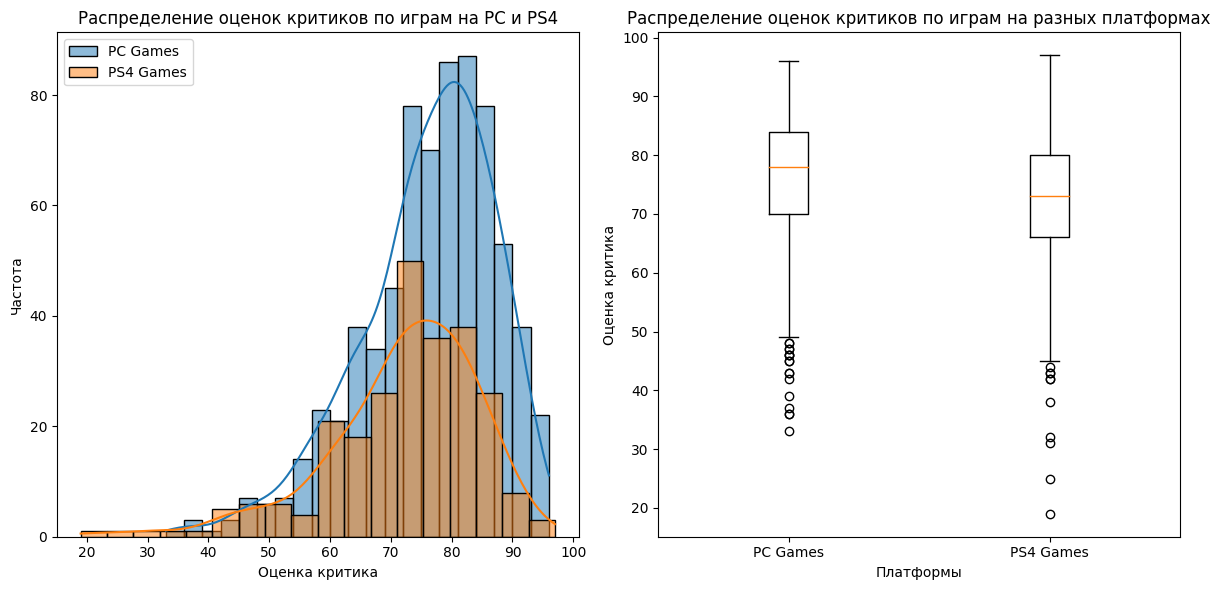

Отклоняем нулевую гипотезу. Средняя оценка критиков по играм на PC больше средней оценки критиков по играм на PS4.

Результаты t-теста для игр на PC и PS4:
t-статистика: 4.544112457929973
p-значение: 6.215797831285281e-06

       Базовые статистики игр на PC  Базовые статистики игр на PS4
count                    715.000000                     252.000000
mean                      75.928671                      72.091270
std                       11.170775                      12.485992
min                       33.000000                      19.000000
25%                       70.000000                      66.000000
50%                       78.000000                      73.000000
75%                       84.000000                      80.000000
max                       96.000000                      97.000000


In [243]:
# Выборка данных по играм на PC
pc_games = df[df['Platform'] == 'PC']['Critic_Score'].dropna()

# Выборка данных по играм на PS4
ps4_games = df[df['Platform'] == 'PS4']['Critic_Score'].dropna()

# Проведение t-теста
t_statistic, p_value = stats.ttest_ind(pc_games, ps4_games)

# Создаем список данных для boxplot
data = [pc_games, ps4_games]

# Создаем список меток для оси x
labels = ['PC Games', 'PS4 Games']

# Создание гистограмм и кривых плотности
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(pc_games, kde=True, label='PC Games')
sns.histplot(ps4_games, kde=True, label='PS4 Games')
plt.xlabel('Оценка критика')
plt.ylabel('Частота')
plt.title('Распределение оценок критиков по играм на PC и PS4')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot(data, labels=labels)
plt.xlabel('Платформы')
plt.ylabel('Оценка критика')
plt.title('Распределение оценок критиков по играм на разных платформах')

# Отображение графиков
plt.tight_layout()
plt.show()

# Статистический вывод
alpha = 0.05
if p_value < alpha:
    if t_statistic < 0:
        print('Отклоняем нулевую гипотезу. Средняя оценка критиков по играм на PC меньше средней оценки критиков по играм на PS4.')
    else:
        print('Отклоняем нулевую гипотезу. Средняя оценка критиков по играм на PC больше средней оценки критиков по играм на PS4.')
else:
    print('Принимаем нулевую гипотезу. Средняя оценка критиков по играм на PC равна средней оценке критиков по играм на PS4.')

# Вывод результатов
print()
print('Результаты t-теста для игр на PC и PS4:')
print('t-статистика:', t_statistic)
print('p-значение:', p_value)

# Создаем DataFrame с базовыми статистиками
stats_df = pd.DataFrame({
    'Базовые статистики игр на PC': pc_games.describe(),
    'Базовые статистики игр на PS4': ps4_games.describe()
})

# Выводим DataFrame
print()
print(stats_df)

Из результатов t-теста для игр на `PC` и `PS4` следует:

Очень маленькое значение `p-значения` (6.215797831285281e-06) говорит о том, что есть статистически значимая разница между рейтингами игр на `PC` и `PS4`.
Значение `t-статистики` (4.544112457929973) показывает, что средний рейтинг игр на `PC` значительно выше, чем на `PS4`.
Базовые статистики подтверждают эту разницу:

Для игр на `PC` (count=715): средний рейтинг - 75.928671, стандартное отклонение - 11.170775.

Для игр на `PS4` (count=252): средний рейтинг - 72.091270, стандартное отклонение - 12.485992.

Исходя из распределения, можно сделать вывод, что игры на `PC` имеют немного более высокие рейтинги по сравнению с играми на `PS4`. Оба распределения рейтингов, как для игр на `PC`, так и для игр на `PS4`, имеют схожие характеристики и являются приближенными к нормальному распределению. Это означает, что большинство рейтингов сконцентрированы вокруг среднего значения, а разница между ними может быть объяснена случайными факторами или другими влияниями.

При сравнении распределений рейтингов медиана может быть более надежным показателем для определения наличия разницы между группами. В данном случае медиана для игр на `PC` равна 78, а для игр на `PS4` 73, что также указывает на то, что игры на `PC` имеют более высокие рейтинги.

### 3) Критикам больше нравятся стрелялки или стратегии?

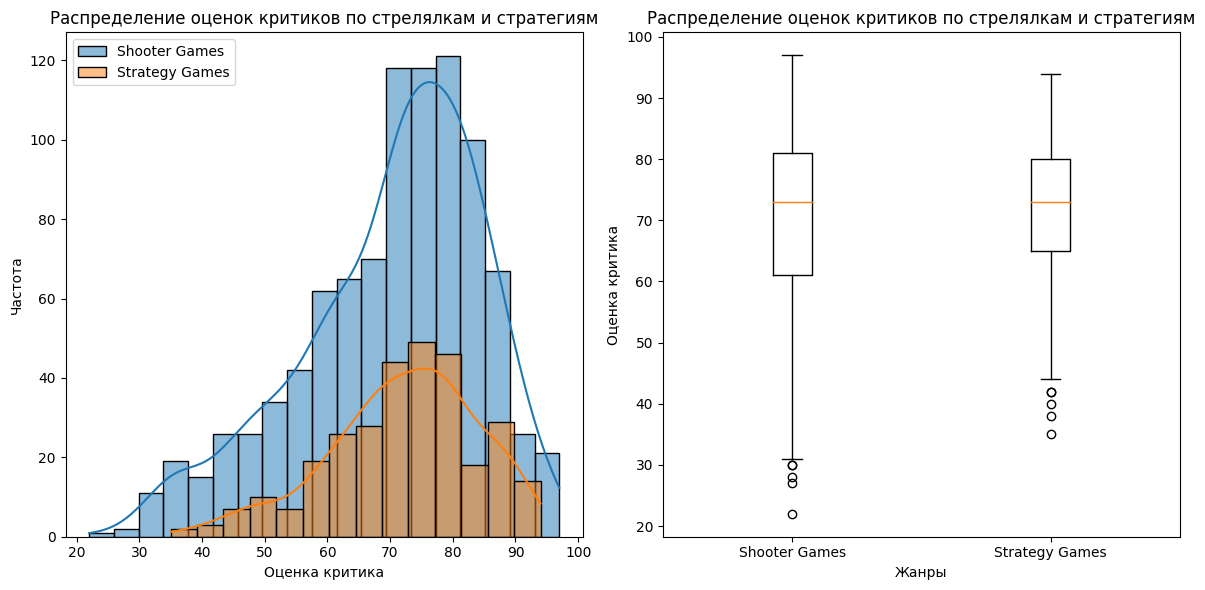

Отклоняем нулевую гипотезу. Средняя оценка критиков по стрелялкам меньше средней оценки критиков по стратегиям.

Результаты t-теста для стрелялок и стратегий:
t-статистика: -2.06670263948504
p-значение: 0.03896871303135602

       Базовые статистики по стрелялкам  Базовые статистики по стратегиям
count                        944.000000                        302.000000
mean                          70.181144                         72.086093
std                           14.552571                         11.828475
min                           22.000000                         35.000000
25%                           61.000000                         65.000000
50%                           73.000000                         73.000000
75%                           81.000000                         80.000000
max                           97.000000                         94.000000


In [244]:
# Выборка данных по стрелялкам
shooter_games = df[df['Genre'] == 'Shooter']['Critic_Score'].dropna()

# Выборка данных по стратегиям
strategy_games = df[df['Genre'] == 'Strategy']['Critic_Score'].dropna()

# Проведение t-теста
t_statistic, p_value = stats.ttest_ind(shooter_games, strategy_games)

# Создаем список данных для boxplot
data = [shooter_games, strategy_games]

# Создаем список меток для оси x
labels = ['Shooter Games', 'Strategy Games']

# Создание гистограмм и кривых плотности
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(shooter_games, kde=True, label='Shooter Games')
sns.histplot(strategy_games, kde=True, label='Strategy Games')
plt.xlabel('Оценка критика')
plt.ylabel('Частота')
plt.title('Распределение оценок критиков по стрелялкам и стратегиям')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot(data, labels=labels)
plt.xlabel('Жанры')
plt.ylabel('Оценка критика')
plt.title('Распределение оценок критиков по стрелялкам и стратегиям')

# Отображение графиков
plt.tight_layout()
plt.show()

# Статистический вывод
alpha = 0.05
if p_value < alpha:
    if t_statistic < 0:
        print('Отклоняем нулевую гипотезу. Средняя оценка критиков по стрелялкам меньше средней оценки критиков по стратегиям.')
    else:
        print('Отклоняем нулевую гипотезу. Средняя оценка критиков по стрелялкам больше средней оценки критиков по стратегиям.')
else:
    print('Принимаем нулевую гипотезу. Средняя оценка критиков по стрелялкам равна средней оценке критиков по стратегиям.')

# Вывод результатов
print()
print('Результаты t-теста для стрелялок и стратегий:')
print('t-статистика:', t_statistic)
print('p-значение:', p_value)

# Создаем DataFrame с базовыми статистиками
stats_df = pd.DataFrame({
    'Базовые статистики по стрелялкам': shooter_games.describe(),
    'Базовые статистики по стратегиям': strategy_games.describe()
})

# Выводим DataFrame
print()
print(stats_df)

Из результатов t-теста для стрелялок и стратегий следует:

Маленькое значение `p-значения` (0.03896871303135602) говорит о том, что есть статистически значимая разница между оценками критиков для стрелялок и стратегий.
Значение `t-статистики` (-2.06670263948504) показывает, что средняя оценка критиков для стрелялок меньше, чем для стратегий.
Базовые статистики подтверждают эту разницу:

Для стрелялок (count=944): средняя оценка критиков - 70.181144, стандартное отклонение - 14.552571.
Для стратегий (count=302): средняя оценка критиков - 72.086093, стандартное отклонение - 11.828475.
Исходя из распределения, можно сделать вывод, что оценки критиков для стратегий имеют более высокие значения по сравнению с оценками критиков для стрелялок. Оба распределения оценок критиков, как для стрелялок, так и для стратегий, имеют схожие характеристики и являются приближенными к нормальному распределению. Это означает, что большинство оценок сконцентрированы вокруг среднего значения, а разница между ними может быть объяснена случайными факторами или другими влияниями.

Медиана для стрелялок равна 73, а для стратегий 73, что может указывать на отсутствие значительной разницы в оценках критиков

## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Привидите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names_out()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);  
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);  
7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;  
8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);  
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

### импорт библиотек

In [245]:
# импорт библиотек
import glob
import pandas as pd
import re

### Загружаем данные

In [246]:
data = pd.read_csv('https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Statistika_v_Python/Kejs_stadi/spam.csv')
# Загружаем данные
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Приведение текста к нижнему регистру

In [247]:
# Приведение текста к нижнему регистру
data['Message'] = data['Message'].str.lower()
data

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ü b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


### Удаление мусорных символов

In [248]:
# Удаление мусорных символов
for i in range(len(data['Message'])):
    data['Message'][i] = re.sub(r'[^a-zA-Zа-яА-Я0-9\s]', '', data['Message'][i])
data

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will b going to esplanade fr home
5569,ham,pity was in mood for that soany other suggest...
5570,ham,the guy did some bitching but i acted like id ...


### Удаление стоп-слов

In [249]:
# Удаление стоп-слов
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)

stop_words = set(stopwords.words('english'))

filtered_text = []

for text in data['Message']:
    words = text.split()
    filtered_words = []
    for word in words:
        if word not in stop_words:
            filtered_words.append(word)
    filtered_text.append(' '.join(filtered_words))

data['Message'] = filtered_text
data

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though
...,...,...
5567,spam,2nd time tried 2 contact u u 750 pound prize 2...
5568,ham,b going esplanade fr home
5569,ham,pity mood soany suggestions
5570,ham,guy bitching acted like id interested buying s...


### Приведение слов к нормальной форме

In [250]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('omw-1.4', quiet=True)
nltk.download('wordnet', quiet=True)

lemmatizer = WordNetLemmatizer()
lemmatized_text = []

for text in data['Message']:
    words = text.split()
    lemmatized_words = []
    for word in words:
        lemmatized_word = lemmatizer.lemmatize(word)
        lemmatized_words.append(lemmatized_word)
    lemmatized_text.append(' '.join(lemmatized_words))

data['Message'] = lemmatized_text
data

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think go usf life around though
...,...,...
5567,spam,2nd time tried 2 contact u u 750 pound prize 2...
5568,ham,b going esplanade fr home
5569,ham,pity mood soany suggestion
5570,ham,guy bitching acted like id interested buying s...


### Преобразование сообщений в вектора TF-IDF

In [251]:
# Преобразование сообщений в вектора TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data.Message)
names = tfidf.get_feature_names_out()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
tfidf_matrix

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zebra,zed,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Разделение данных на тестовую и тренировочную выборки

In [252]:
# Разделение данных на тестовую и тренировочную выборки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data.Category, test_size=0.3, random_state=42)

### Построение модели логистической регрессии

In [255]:
# Построение модели логистической регрессии
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Оценка точности модели на тестовых данных

In [256]:
# Оценка точности модели на тестовых данных
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9539473684210527


Модель достигла точности 95.4% на тестовых данных, что говорит о её способности довольно точно предсказывать, является ли сообщение спамом или нет.

### Создание confusion matrix

In [257]:
# Создание confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[1444    4]
 [  73  151]]


Верно классифицировано:
- 1444 сообщений, которые являются неспамом и были правильно классифицированы как неспам.
- 151 сообщений, которые являются спамом и были правильно классифицированы как спам.

Неверно классифицировано:
- 4 сообщения, которые являются неспамом, но были ошибочно классифицированы как спам.
- 73 сообщения, которые являются спамом, но были ошибочно классифицированы как неспам.

Вывод:

Модель показывает высокую точность и может быть использована для классификации сообщений как спам или неспам с высокой достоверностью. Однако, она делает некоторое количество ошибок, классифицируя некоторые неспамовые сообщения как спам и наоборот.

### Создание датафрейма с неправильно классифицированными сообщениями

In [258]:
misclassified_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
misclassified_df = misclassified_df[misclassified_df['Actual'] != misclassified_df['Predicted']]
misclassified_df['Message'] = data.loc[misclassified_df.index, 'Message']
misclassified_df = misclassified_df.reset_index(drop=True)
print("Misclassified messages:")
misclassified_df

Misclassified messages:


,Actual,Predicted,Message
0,ham,spam,hey free call
1,spam,ham,reminder downloaded content already paid goto ...
2,spam,ham,guess somebody know secretly fancy wanna find ...
3,spam,ham,oh god ive found number im glad text back xaft...
4,spam,ham,next amazing xxx picsfree1 video sent enjoy on...
...,...,...,...
72,spam,ham,unique enough find 30th august wwwareyouunique...
73,spam,ham,freemsg hi baby wow got new cam moby wanna c h...
74,spam,ham,important customer service announcement premier
75,ham,spam,free nowcan call


Этот код создает датафрейм `misclassified_df` содержащий информацию об ошибках классификации модели. В нем есть следующие столбцы:
- `Actual` - фактическая категория сообщения (из тестовой выборки)
- `Predicted` - предсказанная моделью категория сообщения
- `Message` - текст сообщения

Сначала создается пустой датафрейм, где столбцы `Actual` и `Predicted` заполняются фактическими и предсказанными категориями соответственно. Затем в этом датафрейме оставляются только строки, где фактическая и предсказанная категории не совпадают.

Далее в датафрейме создается столбец `Message`, в котором содержится текст ошибочно классифицированного сообщения. Для этого используется функция `loc`, которая возвращает значения из столбца `Message` в исходных данных (`data`) по индексам строк, которые остались в `misclassified_df`.

Наконец, индексы в `misclassified_df` переиндексируются с помощью `reset_index`(`drop=True`), чтобы они шли последовательно от 0 до N-1, где N - количество ошибочно классифицированных сообщений.

Выводится датафрейм `misclassified_df` с текстом ошибочно классифицированных сообщений.

в количестве 77 строк (4 +73):
```
Confusion matrix:
[[1444    4]
 [  73  151]]
```